# Выпускной проект

Борисенко Геннадий, н.с. биогидрохимии ИО РАН, дата исполнения 29.12.2024

## Направление: Промышленность

Чтобы оптимизировать производственные расходы, металлургический комбинат «Стальная птица» решил уменьшить потребление электроэнергии на этапе обработки стали.

## Описание технологического процесса обработки стали

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша.

Из сплава выводится сера (этот процесс — десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (от англ. tribe — «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (от англ. slab — «плита»).


**Цель работы: построить модель, которая будет предсказывать температуру сплава при разливе в заготовки**

## Описание данных, полученных для работы


Данные состоят из нескольких файлов, полученных из разных источников:

* data_arc_new.csv — данные об электродах;
* data_bulk_new.csv — данные о подаче сыпучих материалов (объём);
* data_bulk_time_new.csv — данные о подаче сыпучих материалов (время);
* data_gas_new.csv — данные о продувке сплава газом;
* data_temp_new.csv — результаты измерения температуры;
* data_wire_new.csv — данные о проволочных материалах (объём);
* data_wire_time_new.csv — данные о проволочных материалах (время).

Описание колонок в файлах файлов:

Файл data_arc_new.csv

* key — номер партии;
* Начало нагрева дугой — время начала нагрева;
* Конец нагрева дугой — время окончания нагрева;
* Активная мощность — значение активной мощности;
* Реактивная мощность — значение реактивной мощности.


Файл data_bulk_new.csv

* key — номер партии;
* Bulk 1 … Bulk 15 — объём подаваемого материала.

Файл data_bulk_time_new.csv

* key — номер партии;
* Bulk 1 … Bulk 15 — время подачи материала.

Файл data_gas_new.csv

* key — номер партии;
* Газ 1 — объём подаваемого газа.

Файл data_temp_new.csv

* key — номер партии;
* Время замера — время замера;
* Температура — значение температуры.

Файл data_wire_new.csv

* key — номер партии;
* Wire 1 … Wire 9 — объём подаваемых проволочных материалов.

Файл data_wire_time_new.csv

* key — номер партии;
* Wire 1 … Wire 9 — время подачи проволочных материалов.

## План проекта

1. Загрузка данных (конструкция try..except)
2. Исследование kаждого датафрейма (info, пропуски, describe, визуализации)
3. Предобработка данных (удаление аномалий, заполнение пропусков, генерация новых признаков, агрегирование по ключу)
2. Объединение в один датафрейм.
3. Исследование объединённого датафрейма, предобработка (с учётом используемых моделей).
5. МО: подбор гиперпараметров, получение метрики на кросс-валидации, выбор лучшей модели.
4. Разделение на выборки и масштабирование (при необходимости).
6. Проверка качества лучшей модели на тестовой выборке.
7. Исследование важности признаков. 
8. Выводы по выполненной работе и рекомендации для заказчика.

Создаем первичный импорт для обработки данных:

In [1]:
!pip install phik

In [133]:
import pandas as pd
import os
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import phik
from sklearn.model_selection import train_test_split, RandomizedSearchCV 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.metrics import make_scorer, mean_absolute_error 
from sklearn.neural_network import MLPRegressor

import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV

RANDOM_STATE = 241224
TEST_SIZE = 0.25


Открытие файлов через os:

In [3]:
try:
    folder_path = 'final_datasets'
    files = os.listdir(folder_path)

    for file in files:
        if file.endswith('.csv'):
            variable_name = os.path.splitext(file)[0] 
            globals()[variable_name] = pd.read_csv(os.path.join(folder_path, file))
except: 

        data_arc_new = pd.read_csv('/datasets/data_arc_new.csv')
        data_bulk_new = pd.read_csv('/datasets/data_bulk_new.csv')
        data_bulk_time_new = pd.read_csv('/datasets/data_bulk_time_new.csv')
        data_gas_new = pd.read_csv('/datasets/data_gas_new.csv')
        data_temp_new = pd.read_csv('/datasets/data_temp_new.csv')
        data_wire_new = pd.read_csv('/datasets/data_wire_new.csv')
        data_wire_time_new = pd.read_csv('/datasets/data_wire_time_new.csv')


Обзор данных c красивыми таблицами display:

In [4]:
data_frames = {
    'data_arc_new': data_arc_new,
    'data_bulk_new': data_bulk_new,
    'data_bulk_time_new': data_bulk_time_new,
    'data_gas_new': data_gas_new,
    'data_temp_new': data_temp_new,
    'data_wire_new': data_wire_new,
    'data_wire_time_new': data_wire_time_new
}

for name, df in data_frames.items():
    print('Имя файла:', name)
    display(df.head(6))


Имя файла: data_arc_new


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.381124,0.220351


Имя файла: data_bulk_new


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
5,6,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,201.0,154.0


Имя файла: data_bulk_time_new


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47
5,6,NaN,NaN,NaN,2019-05-03 13:57:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:48:52,NaN,2019-05-03 14:09:42,2019-05-03 14:03:15


Имя файла: data_gas_new


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
5,6,11.273392


Имя файла: data_temp_new


,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
5,1,2019-05-03 11:30:38,1613.0


Имя файла: data_wire_new


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,99.109917,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Имя файла: data_wire_time_new


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2019-05-03 13:57:27,2019-05-03 13:48:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Вывод общей информации о датафреймах

In [5]:
for name, df in data_frames.items():
    print('Имя файла:', name)
    display(df.info())


Имя файла: data_arc_new
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None

Имя файла: data_bulk_new
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

Имя файла: data_bulk_time_new
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


None

Имя файла: data_gas_new
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

Имя файла: data_temp_new
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


None

Имя файла: data_wire_new
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

Имя файла: data_wire_time_new
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


None

Что можно сделать по каждому набору:
 1. Имя файла: data_arc_new - перевести даты и время в формат дата время, посчитать полную мощность как  корень квадратный из суммы квадратов активной и реактивной мощности, посчитать время разряда и осреднить по ключу
 2. Имя файла: data_bulk_new - заполнить пропуски нулем (т.к. если присадка не добавленна, то это 0), объеденить по предварительному анализу присадки, есть много признков с небольшим количеством заполненных строк, возможно стоит их удалить или объеденить, т.к. это уменьшит сложность модели.
 3. Имя файла: data_gas_new проверить на аномалии, проверить пропуски
 4. Согласно обзору данных и консультации с заказчиком таблицы с временем добавления сыпучих и проволочных присадок (Имя файла: data_wire_time_new, Имя файла: data_bulk_time_new) не нужны для целей моделирования, поэтому ими можно в дальнейшем принебречь.
 5. Имя файла: data_temp_new - заполнить пропуски средним по ключу где пропуск, если для ключа нельзя вычислить среднее - удаляем такой ключ (измерений должно быть минимум 2 - начало и конец), для моделирования это самая важная таболица - нам обязательно в финальный датафрйм нужно подать температуру начала, температуру среднюю по ключу, предсказывать нужно температуру разлива стальной плиты.
6. Имя файла: data_wire_new - та же история что и с data_bulk_new 

Переведем колонки со временем в формат дата-время:

In [6]:
data_arc_new['Начало нагрева дугой'] = pd.to_datetime(data_arc_new['Начало нагрева дугой'])
data_arc_new['Конец нагрева дугой'] = pd.to_datetime(data_arc_new['Конец нагрева дугой'])

Проверка

In [7]:
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14876 non-null  int64         
 1   Начало нагрева дугой  14876 non-null  datetime64[ns]
 2   Конец нагрева дугой   14876 non-null  datetime64[ns]
 3   Активная мощность     14876 non-null  float64       
 4   Реактивная мощность   14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


In [8]:
data_temp_new['Время замера'] = pd.to_datetime(data_temp_new['Время замера'])

Проверка

In [9]:
for name, df in data_frames.items():
    print('Имя файла:', name)
    display(df.info())


Имя файла: data_arc_new
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14876 non-null  int64         
 1   Начало нагрева дугой  14876 non-null  datetime64[ns]
 2   Конец нагрева дугой   14876 non-null  datetime64[ns]
 3   Активная мощность     14876 non-null  float64       
 4   Реактивная мощность   14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


None

Имя файла: data_bulk_new
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

Имя файла: data_bulk_time_new
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


None

Имя файла: data_gas_new
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

Имя файла: data_temp_new
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           18092 non-null  int64         
 1   Время замера  18092 non-null  datetime64[ns]
 2   Температура   14665 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 424.2 KB


None

Имя файла: data_wire_new
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

Имя файла: data_wire_time_new
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


None

Заполним пропуски нулем у data_wire_new и data_bulk_new

In [10]:
data_wire_new = data_wire_new.fillna(0)
data_bulk_new = data_bulk_new.fillna(0)

Посчитаем количество пропусков:

In [11]:
tup = [
    ('data_arc_new', data_arc_new),
    ('data_bulk_new', data_bulk_new),
    ('data_gas_new', data_gas_new),
    ('data_temp_new', data_temp_new),
    ('data_wire_new', data_wire_new)
]

for name, variable in tup:
    print(f'Количество пропусков в {name}: \n{variable.isna().sum()}')
    print('')


Количество пропусков в data_arc_new: 
key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64

Количество пропусков в data_bulk_new: 
key        0
Bulk 1     0
Bulk 2     0
Bulk 3     0
Bulk 4     0
Bulk 5     0
Bulk 6     0
Bulk 7     0
Bulk 8     0
Bulk 9     0
Bulk 10    0
Bulk 11    0
Bulk 12    0
Bulk 13    0
Bulk 14    0
Bulk 15    0
dtype: int64

Количество пропусков в data_gas_new: 
key      0
Газ 1    0
dtype: int64

Количество пропусков в data_temp_new: 
key                0
Время замера       0
Температура     3427
dtype: int64

Количество пропусков в data_wire_new: 
key       0
Wire 1    0
Wire 2    0
Wire 3    0
Wire 4    0
Wire 5    0
Wire 6    0
Wire 7    0
Wire 8    0
Wire 9    0
dtype: int64



Удалим все ключи, где есть пропущенные значения, то есть целевая переменная NaN. По полученным данным это ключи с номера 2500 и до конца, возможно что-то случилось на ковше 2500. Уберем эти ковши и обратим внимание заказчика на них.

In [12]:
data_temp_new.isna().sum()

key                0
Время замера       0
Температура     3427
dtype: int64

Выводы по разделу:
    
1. Произвделен превичный обзор данных
2. Изменены типы данных 
3. Заполнены пропуски
4. Выявлены потенциальные проблемы в данных
5. При измерении температуры выявлены проблемы с ключа 2500, там вообще нет измерений, возможно что-то сломалось.

In [13]:
data_temp_new=data_temp_new.drop('Время замера', axis=1)

In [14]:
data_temp_new

,key,Температура
0,1,1571.0
1,1,1604.0
2,1,1618.0
3,1,1601.0
4,1,1606.0
...,...,...
18087,3241,NaN
18088,3241,NaN
18089,3241,NaN
18090,3241,NaN


In [15]:
data_temp_new=data_temp_new.query('Температура > 1400')
display(data_temp_new)

,key,Температура
0,1,1571.0
1,1,1604.0
2,1,1618.0
3,1,1601.0
4,1,1606.0
...,...,...
18061,3237,1569.0
18067,3238,1584.0
18071,3239,1598.0
18080,3240,1617.0


In [16]:
data_key = data_temp_new.groupby('key')[['Температура']].count()
display(data_key)

data_key1 = pd.DataFrame(data_key)

,Температура
key,
1,6
2,5
3,6
4,5
5,5
...,...
3237,1
3238,1
3239,1


In [17]:
data_key2=data_key1[data_key1['Температура']<2].index.to_list()
data_temp_new = data_temp_new[~data_temp_new['key'].isin(data_key2)]
data_key2

[195,
 279,
 2500,
 2501,
 2502,
 2503,
 2504,
 2505,
 2506,
 2507,
 2508,
 2509,
 2510,
 2511,
 2512,
 2513,
 2514,
 2515,
 2516,
 2517,
 2518,
 2519,
 2520,
 2521,
 2522,
 2523,
 2524,
 2525,
 2526,
 2527,
 2528,
 2529,
 2530,
 2531,
 2532,
 2533,
 2534,
 2535,
 2536,
 2537,
 2538,
 2539,
 2540,
 2541,
 2542,
 2543,
 2544,
 2545,
 2546,
 2547,
 2548,
 2549,
 2550,
 2551,
 2552,
 2553,
 2554,
 2555,
 2556,
 2557,
 2558,
 2559,
 2560,
 2562,
 2563,
 2564,
 2565,
 2566,
 2567,
 2568,
 2569,
 2570,
 2571,
 2572,
 2573,
 2574,
 2575,
 2576,
 2577,
 2578,
 2579,
 2580,
 2581,
 2582,
 2583,
 2584,
 2585,
 2586,
 2587,
 2588,
 2589,
 2590,
 2591,
 2592,
 2593,
 2594,
 2595,
 2596,
 2597,
 2598,
 2599,
 2600,
 2601,
 2602,
 2603,
 2604,
 2605,
 2606,
 2607,
 2608,
 2609,
 2610,
 2611,
 2612,
 2613,
 2614,
 2615,
 2616,
 2617,
 2618,
 2619,
 2620,
 2621,
 2622,
 2623,
 2624,
 2625,
 2626,
 2627,
 2628,
 2629,
 2630,
 2631,
 2632,
 2633,
 2634,
 2635,
 2636,
 2637,
 2638,
 2639,
 2640,
 2641,
 

In [18]:
data_temp_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13920 entries, 0 to 13925
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   key          13920 non-null  int64  
 1   Температура  13920 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 326.2 KB


## Исследовательский анализ каждого датафрейма и преобразования исходных таблиц

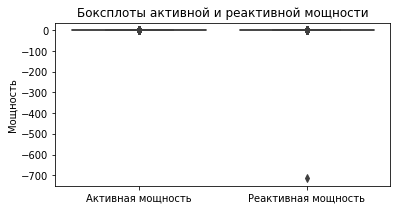

In [19]:
tup = [
    ('data_arc_new', data_arc_new),
    ('data_bulk_new', data_bulk_new),
    ('data_gas_new', data_gas_new),
    ('data_temp_new', data_temp_new),
    ('data_wire_new', data_wire_new)
]

plt.figure(figsize=(6,3))
sns.boxplot(data=data_arc_new[['Активная мощность', 'Реактивная мощность']])
plt.title('Боксплоты активной и реактивной мощности')
plt.ylabel('Мощность')
plt.xticks(ticks=[0, 1], labels=['Активная мощность', 'Реактивная мощность'])
plt.show()


In [20]:
data_arc_new = data_arc_new[data_arc_new['Реактивная мощность']>=0]

Есть реактивная мощность меньше 0, это физически невозможно - удалим такие ключи.

Удаляю объект

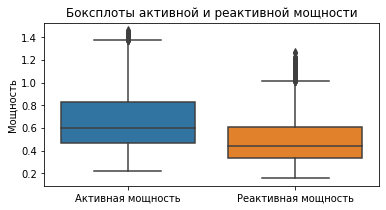

In [21]:
plt.figure(figsize=(6,3))
sns.boxplot(data=data_arc_new[['Активная мощность', 'Реактивная мощность']])
plt.title('Боксплоты активной и реактивной мощности')
plt.ylabel('Мощность')
plt.xticks(ticks=[0, 1], labels=['Активная мощность', 'Реактивная мощность'])
plt.show()


Мощность более 3 квартиля удалять не будем, т.к. возможно это часть промышленного процесса (это то, что в презентации названо "супер выбросы")

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>ок)</p>
</div>

In [22]:
data_arc_new.loc[:, 'Время нагрева'] = \
(data_arc_new.loc[:, 'Конец нагрева дугой'] - data_arc_new.loc[:, 'Начало нагрева дугой']).dt.total_seconds().astype(int)


/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [23]:
data_arc_new.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,Время нагрева
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,228
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,185
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,172
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,365
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,148


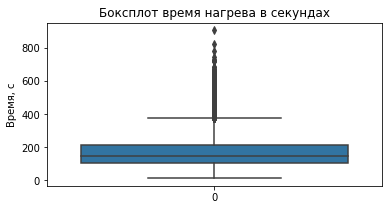

In [24]:
plt.figure(figsize=(6,3))
sns.boxplot(data=data_arc_new['Время нагрева'])
plt.title('Боксплот время нагрева в секундах')
plt.ylabel('Время, с')
plt.show()

Наблюдаются выбросы (супер выбросы) во времени нагрева, где время более 800 с. Удалять тоже не будем, вдруг это эксперементальная величина.

Активная мощность (P) и реактивная мощность (Q) — это два типа мощности, используемые в электрических системах:

1. Активная мощность (P):
   - Измеряется в ваттах (Вт).
   - Отвечает за выполнение полезной работы (например, освещение, нагрев).
   - Это мощность, которая фактически преобразуется в работу.

2. Реактивная мощность (Q):
   - Измеряется в вольт-амперах реактивных (ВАр).
   - Связана с созданием магнитных полей в индуктивных и емкостных компонентах (например, трансформаторы, двигатели).
   - Не выполняет полезную работу, но необходима для поддержания электрических и магнитных полей.

Разница между ними заключается в том, что активная мощность выполняет полезную работу, в то время как реактивная мощность поддерживает функционирование электрических устройств, но не преобразуется в работу.

In [25]:
data_arc_new['Полная мощность'] = np.sqrt(data_arc_new['Активная мощность']**2 + data_arc_new['Реактивная мощность']**2)

/tmp/ipykernel_402/3972707255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_arc_new['Полная мощность'] = np.sqrt(data_arc_new['Активная мощность']**2 + data_arc_new['Реактивная мощность']**2)


In [26]:
data_arc_new.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,Время нагрева,Полная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,228,0.371123
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,185,0.902319
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,172,0.722536
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,365,0.642824
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,148,1.079934


In [27]:
data_arc_new = data_arc_new[['key', 'Время нагрева', 'Полная мощность']]

In [28]:
data_arc_new.head()

,key,Время нагрева,Полная мощность
0,1,228,0.371123
1,1,185,0.902319
2,1,172,0.722536
3,1,365,0.642824
4,1,148,1.079934


Создадим сводную таблицу, где аггрегирующей функцией по каждому ключу будет сумма 

In [29]:
data_arc_new = data_arc_new.pivot_table(index='key', values=['Время нагрева', 'Полная мощность'], aggfunc='sum')

In [30]:
data_arc_new.head()

,Время нагрева,Полная мощность
key,,
1,1098,3.718736
2,811,2.588349
3,655,5.019223
4,741,3.400038
5,869,2.816980


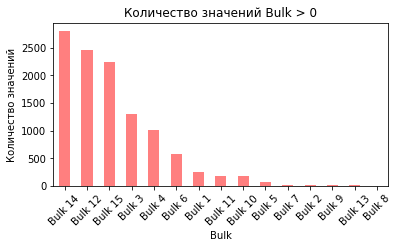

In [31]:
bulk_counts = (data_bulk_new[data_bulk_new.columns[1:]] > 0).sum().sort_values(ascending=False)

bulk_counts.plot(kind='bar', figsize=(6,3), color='red', alpha=0.5)
plt.title('Количество значений Bulk > 0')
plt.xlabel('Bulk')
plt.ylabel('Количество значений')
plt.xticks(rotation=45)
plt.show()

Наибольшее количество раз добавляют bulk 14, 12, 15, 3, 4

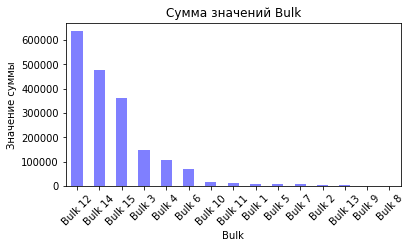

In [32]:
bulk_sums = data_bulk_new[['Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6', 
                            'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 
                            'Bulk 12', 'Bulk 13', 'Bulk 14', 'Bulk 15']].sum().sort_values(ascending=False)

bulk_sums.plot(kind='bar', figsize=(6,3), color='blue', alpha=0.5)
plt.title('Сумма значений Bulk')
plt.xlabel('Bulk')
plt.ylabel('Значение суммы')
plt.xticks(rotation=45)
plt.show()

Создадим колонку прочее, которая будет включать сумму всего bulk

In [33]:
data_bulk_new['Прочее_bulk'] = data_bulk_new[['Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6', 'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 12', 'Bulk 13', 'Bulk 14', 'Bulk 15']].sum(axis=1)

In [34]:
data_bulk_new = data_bulk_new[['key', 'Прочее_bulk']]

data_bulk_new.head()

,key,Прочее_bulk
0,1,553.0
1,2,582.0
2,3,544.0
3,4,595.0
4,5,584.0


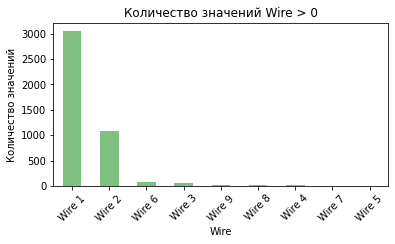

In [35]:
wire_counts = (data_wire_new[data_wire_new.columns[1:]] > 0).sum().sort_values(ascending=False)

wire_counts.plot(kind='bar', figsize=(6,3
                                     ), color='green', alpha=0.5)
plt.title('Количество значений Wire > 0')
plt.xlabel('Wire')
plt.ylabel('Количество значений')
plt.xticks(rotation=45)
plt.show()


Чаще всего добавляют Wire 1, 2

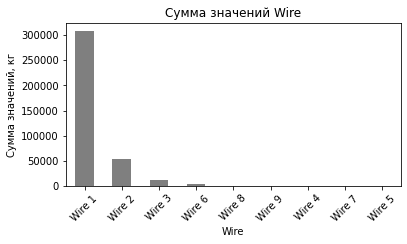

In [36]:
wire_sums = data_wire_new[data_wire_new.columns[1:]].sum().sort_values(ascending=False)

wire_sums.plot(kind='bar', figsize=(6,3), color='black', alpha=0.5)
plt.title('Сумма значений Wire')
plt.xlabel('Wire')
plt.ylabel('Сумма значений, кг')
plt.xticks(rotation=45)
plt.show()

Объеденим все wire значения

In [37]:
data_wire_new.columns

Index(['key', 'Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6',
       'Wire 7', 'Wire 8', 'Wire 9'],
      dtype='object')

In [38]:
data_wire_new['Прочее_wire'] = data_wire_new[['Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6',
       'Wire 7', 'Wire 8', 'Wire 9']].sum(axis=1)
data_wire_new = data_wire_new[['key', 'Прочее_wire']]

In [39]:
data_wire_new.head()

,key,Прочее_wire
0,1,60.059998
1,2,96.052315
2,3,91.160157
3,4,89.063515
4,5,98.352796


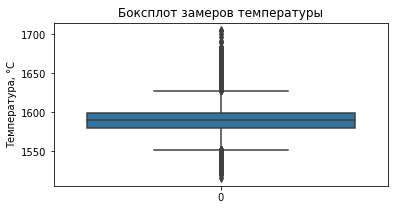

In [40]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=data_temp_new['Температура'])
plt.title('Боксплот замеров температуры')
plt.ylabel('Температура, °C')  
plt.show()


Температура плавления железа - основного металла в стали = 1 538°C, поэтому все, что ниже величины 1400 градусов удаляем.

In [41]:
data_temp_new = data_temp_new[data_temp_new['Температура'] > 1400]

In [42]:
data_temp_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13920 entries, 0 to 13925
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   key          13920 non-null  int64  
 1   Температура  13920 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 326.2 KB


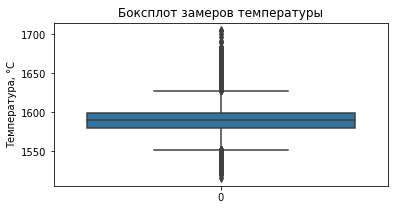

In [43]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=data_temp_new['Температура'])
plt.title('Боксплот замеров температуры')
plt.ylabel('Температура, °C')  
plt.show()


По концепции построения окончательного датафрейма должно быть минимум 2 измерения температуры - удаляем ключи 195 и 279

In [44]:
data_temp_new = data_temp_new[~data_temp_new['key'].isin([195, 279])]


In [45]:
data_temp_new.head()

,key,Температура
0,1,1571.0
1,1,1604.0
2,1,1618.0
3,1,1601.0
4,1,1606.0


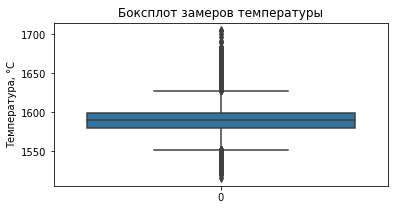

In [46]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=data_temp_new['Температура'])
plt.title('Боксплот замеров температуры')
plt.ylabel('Температура, °C')  
plt.show()


In [47]:
data_temp_new.isna().sum()

key            0
Температура    0
dtype: int64

In [48]:
data_temp_new[data_temp_new['Температура'].isna()]

,key,Температура


Проверка

In [49]:
for name, variable in [('data_temp_new', data_temp_new)]:
    print(f'Value counts в {name}: \n{variable ["key"].value_counts()}')
    print('')

Value counts в data_temp_new: 
2108    17
1513    16
1689    16
322     14
46      14
        ..
1535     2
943      2
1369     2
49       2
1974     2
Name: key, Length: 2475, dtype: int64



Для создания нового признака в финальную таблицу добавим: 1. начальная температура 2. средняя температура 3. конечная температура розлива

In [50]:
temperature = data_temp_new.groupby('key').agg(
    Начальная_температура=('Температура', 'first'),
    Температура_розлива=('Температура', 'last')
).reset_index()

display(temperature)


,key,Начальная_температура,Температура_розлива
0,1,1571.0,1613.0
1,2,1581.0,1602.0
2,3,1596.0,1599.0
3,4,1601.0,1625.0
4,5,1576.0,1602.0
...,...,...,...
2470,2495,1570.0,1591.0
2471,2496,1554.0,1591.0
2472,2497,1571.0,1589.0
2473,2498,1591.0,1594.0


удаляю далее

In [51]:
temperature.isna().sum()

key                      0
Начальная_температура    0
Температура_розлива      0
dtype: int64

In [52]:
tup = [
    ('data_arc_new', data_arc_new),
    ('data_bulk_new', data_bulk_new),
    ('data_gas_new', data_gas_new),
    ('temperature', temperature),
    ('data_wire_new', data_wire_new)
]

for name, variable in tup:
    print(f'Имя файла: {name}')
    display(variable.head())
    

Имя файла: data_arc_new


,Время нагрева,Полная мощность
key,,
1,1098,3.718736
2,811,2.588349
3,655,5.019223
4,741,3.400038
5,869,2.816980


Имя файла: data_bulk_new


,key,Прочее_bulk
0,1,553.0
1,2,582.0
2,3,544.0
3,4,595.0
4,5,584.0


Имя файла: data_gas_new


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


Имя файла: temperature


,key,Начальная_температура,Температура_розлива
0,1,1571.0,1613.0
1,2,1581.0,1602.0
2,3,1596.0,1599.0
3,4,1601.0,1625.0
4,5,1576.0,1602.0


Имя файла: data_wire_new


,key,Прочее_wire
0,1,60.059998
1,2,96.052315
2,3,91.160157
3,4,89.063515
4,5,98.352796


In [53]:
tup = [
    ('temperature', temperature),
    
]
for name, variable in tup:
    variable.set_index('key', inplace=True)

In [54]:
tup = [
    ('data_arc_new', data_arc_new),
    ('data_bulk_new', data_bulk_new),
    ('data_gas_new', data_gas_new),
    ('temperature', temperature),
    ('data_wire_new', data_wire_new)
]

for name, variable in tup:
    print(f'Имя файла: {name}')
    display(variable.head())
    

Имя файла: data_arc_new


,Время нагрева,Полная мощность
key,,
1,1098,3.718736
2,811,2.588349
3,655,5.019223
4,741,3.400038
5,869,2.816980


Имя файла: data_bulk_new


,key,Прочее_bulk
0,1,553.0
1,2,582.0
2,3,544.0
3,4,595.0
4,5,584.0


Имя файла: data_gas_new


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


Имя файла: temperature


,Начальная_температура,Температура_розлива
key,,
1,1571.0,1613.0
2,1581.0,1602.0
3,1596.0,1599.0
4,1601.0,1625.0
5,1576.0,1602.0


Имя файла: data_wire_new


,key,Прочее_wire
0,1,60.059998
1,2,96.052315
2,3,91.160157
3,4,89.063515
4,5,98.352796


In [55]:
tup = [
    ('data_arc_new', data_arc_new),
    ('data_bulk_new', data_bulk_new),
    ('data_gas_new', data_gas_new),
    ('temperature', temperature),
    ('data_wire_new', data_wire_new)
]

for name, variable in tup:
    print(f'Имя файла: {name}')
    display(variable.info())

Имя файла: data_arc_new
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 1 to 3241
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Время нагрева    3214 non-null   int64  
 1   Полная мощность  3214 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 75.3 KB


None

Имя файла: data_bulk_new
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   key          3129 non-null   int64  
 1   Прочее_bulk  3129 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.0 KB


None

Имя файла: data_gas_new
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

Имя файла: temperature
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 1 to 2499
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Начальная_температура  2475 non-null   float64
 1   Температура_розлива    2475 non-null   float64
dtypes: float64(2)
memory usage: 58.0 KB


None

Имя файла: data_wire_new
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   key          3081 non-null   int64  
 1   Прочее_wire  3081 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 48.3 KB


None

In [56]:
df_list = [
    data_arc_new,
    data_bulk_new,
    data_gas_new,
    temperature,
    data_wire_new
]

In [57]:
data = df_list[0]

for df in df_list[1:]:
    data = data.merge(df, on='key', how='inner')


Сделаем названия английскими и по змеиному регистру

In [58]:
data.columns = data.columns.str.replace(' ', '_').str.lower()
data.rename(columns={
    'время_нагрева': 'heating_time',
    'полная_мощность': 'total_power',
    'прочее_bulk': 'all_bulk',
    'газ_1': 'gas_1',
    'начальная_температура': 'initial_temperature',
    'температура_розлива': 'spilling_temperature',
    'средняя_температура': 'average_temperature',
    'прочее_wire': 'all_wire'
}, inplace=True)

data.head()

,key,heating_time,total_power,all_bulk,gas_1,initial_temperature,spilling_temperature,all_wire
0,1,1098,3.718736,553.0,29.749986,1571.0,1613.0,60.059998
1,2,811,2.588349,582.0,12.555561,1581.0,1602.0,96.052315
2,3,655,5.019223,544.0,28.554793,1596.0,1599.0,91.160157
3,4,741,3.400038,595.0,18.841219,1601.0,1625.0,89.063515
4,5,869,2.816980,584.0,5.413692,1576.0,1602.0,98.352796


In [59]:
data

,key,heating_time,total_power,all_bulk,gas_1,initial_temperature,spilling_temperature,all_wire
0,1,1098,3.718736,553.0,29.749986,1571.0,1613.0,60.059998
1,2,811,2.588349,582.0,12.555561,1581.0,1602.0,96.052315
2,3,655,5.019223,544.0,28.554793,1596.0,1599.0,91.160157
3,4,741,3.400038,595.0,18.841219,1601.0,1625.0,89.063515
4,5,869,2.816980,584.0,5.413692,1576.0,1602.0,98.352796
...,...,...,...,...,...,...,...,...
2324,2495,723,3.868721,719.0,7.125735,1570.0,1591.0,89.150879
2325,2496,940,5.070316,796.0,9.412616,1554.0,1591.0,114.179527
2326,2497,569,4.360918,665.0,6.271699,1571.0,1589.0,103.134723
2327,2498,750,3.909917,733.0,14.953657,1591.0,1594.0,118.110717


In [60]:
data.isna().sum()

key                     0
heating_time            0
total_power             0
all_bulk                0
gas_1                   0
initial_temperature     0
spilling_temperature    0
all_wire                0
dtype: int64

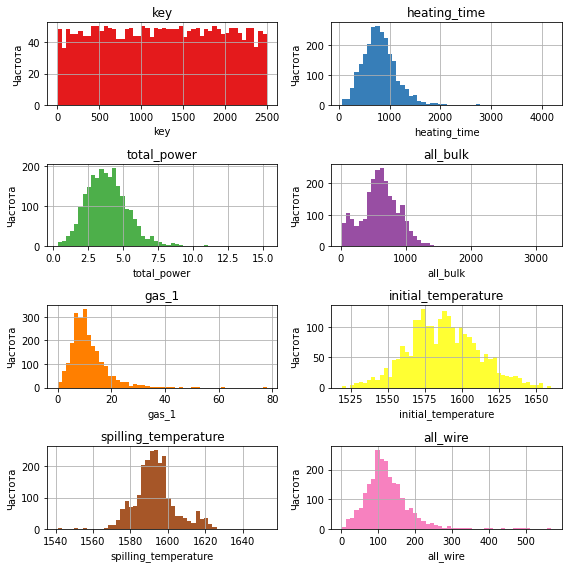

In [61]:
n = len(data.columns)
nrows = (n + 1) // 2 
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(8, nrows * 2))

colors = sns.color_palette("Set1", n_colors=n)

for ax, (column, color) in zip(axes.flatten(), zip(data.columns, colors)):
    data[column].hist(ax=ax, color=color, bins=50)
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Частота')

for i in range(len(data.columns), nrows * 2):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()



In [62]:
data.columns

Index(['key', 'heating_time', 'total_power', 'all_bulk', 'gas_1',
       'initial_temperature', 'spilling_temperature', 'all_wire'],
      dtype='object')

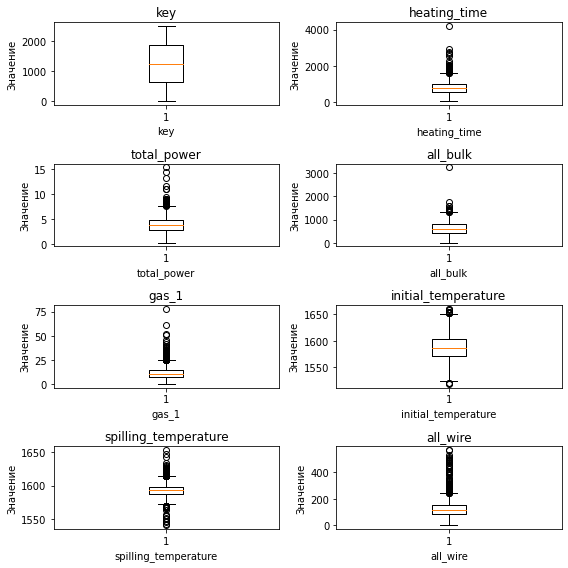

In [63]:
n = len(data.columns)
nrows = (n + 1) // 2 
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(8, nrows * 2))

for ax, column in zip(axes.flatten(), data.columns):
    ax.boxplot(data[column].dropna()) 
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Значение')

for i in range(len(data.columns), nrows * 2):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


Выводы по визуализациям:
1. **heating_time**:Распределение имеет форму нормального распределения, с пиком около 1000. Это может указывать на то, что большинство процессов нагрева занимает около этого времени. На диаграмме размаха есть выбросы до 4000.

2. **total_power**: Похоже на нормальное распределение, с некоторым смещением влево. Это может указывать на то, что большинство процессов использует меньше мощности, но с некоторыми выбросами. Есть выбросы с полной мощностью до 15.

3. **bulk_3, bulk_4, bulk_6, bulk_12, bulk_14, bulk_15**: Эти переменные имеют много нулевых значений, что может указывать на отсутствие использования в большинстве случаев. 

4. **other_bulk**: Распределение показывает много нулевых значений с небольшим количеством положительных значений. Это также может быть признаком недостаточной значимости переменной.

5. **gas_1**: Распределение имеет несколько пиков, что может указывать на различные режимы работы. 

6. **initial_temperature, spilling_temperature, average_temperature**: Все три переменные имеют нормальное распределение, что может быть признаком стабильного процесса. Пиковые значения находятся в диапазоне от 1540 до 1620.

7. **wire_1**: Распределение также похоже на нормальное, с пиком около 100.

8. **wire_2, wire_3**: Эти переменные имеют много нулевых значений, что может указывать на их недостаточную значимость в процессе.

9. **other_wire**: Похоже на то, что эта переменная не вносит значимого вклада в данные, так как распределение очень сжато.
   


- Учитывая высокую вариативность времени нагрева и мощности, стоит рассмотреть возможность оптимизации этих процессов.

- Провести дополнительный анализ для определения причин низкой активности параметров `bulk`. Возможно, стоит рассмотреть их исключение из анализа, если они не влияют на результаты.

- Следует изучить взаимосвязь между параметрами газа и температурой, так как они могут существенно влиять на результаты процессов.

Далее проведем корреляционный анализ для выявления мультиколлениарности:

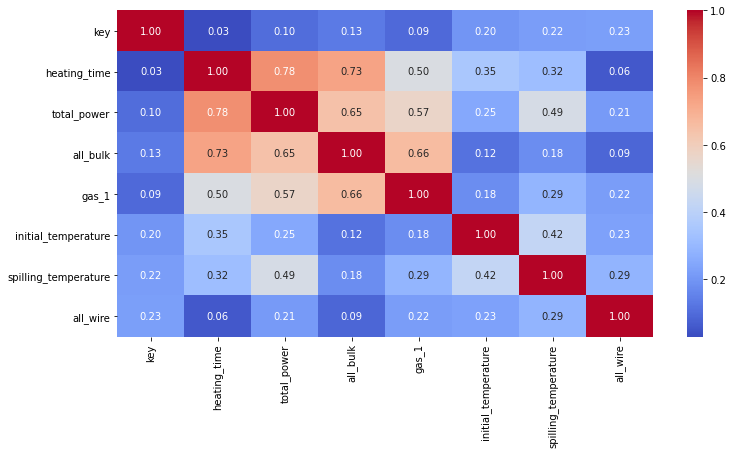

In [64]:
interval_cols =  data.columns.tolist()

fig, ax = plt.subplots(figsize = (12,6))  
sns.heatmap(data.phik_matrix(interval_cols=interval_cols)\
            , annot=True, fmt='.2f', ax=ax, cmap='coolwarm')

plt.show()

In [65]:
data['bulk_wire'] = data['all_bulk'] + data['all_wire']

In [66]:
data = data[['initial_temperature', 'total_power', 'heating_time', 'gas_1', 'all_bulk', 'all_wire', 'spilling_temperature']]

In [67]:
data.head()

,initial_temperature,total_power,heating_time,gas_1,all_bulk,all_wire,spilling_temperature
0,1571.0,3.718736,1098,29.749986,553.0,60.059998,1613.0
1,1581.0,2.588349,811,12.555561,582.0,96.052315,1602.0
2,1596.0,5.019223,655,28.554793,544.0,91.160157,1599.0
3,1601.0,3.400038,741,18.841219,595.0,89.063515,1625.0
4,1576.0,2.816980,869,5.413692,584.0,98.352796,1602.0


**Выводы по разделу:**

- Высокие корреляции (ближе к 1, более 0.9) между `initial_temperature`, `spilling_temperature` и `average_temperature` могут указывать на потенциальные проблемы мультиколлинеарности, если эти переменные будут включены в модель регрессии. Это может сделать модель нестабильной и затруднить интерпретацию коэффициентов. Выход - удалить среднюю температуру разлива флюида.
 
- Наблюдаем мультиколлинеарность между wire и bulk, решено оставить только bulk

## Разделение выборок

In [68]:
X = data.drop(columns=['spilling_temperature']) 
y = data['spilling_temperature']  

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE, test_size=TEST_SIZE)
num_columns=['initial_temperature', 'total_power', 'heating_time', 'gas_1', 'all_bulk', 'all_wire' ]

Выборки разделены

## МО: подбор гиперпараметров, получение метрики на кросс-валидации, выбор лучшей модели

Построим пайплайн

In [69]:
data_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

В работу возьмем 3 модели: Catboost, XGBRegressor и Линейную регрессию

In [104]:
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBRegressor

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

param_grid = [
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    },
    {
        'models': [CatBoostRegressor(random_state=RANDOM_STATE, silent=True)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'models__iterations': [100, 200, 500],
        'models__depth': [4, 6, 8],
        'models__learning_rate': [0.001, 0.1, 0.2]
    },
    
]


In [105]:
random_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions=param_grid, 
    n_iter=100,
    cv=5,
    scoring = 'neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2,  
    random_state=RANDOM_STATE
)

random_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', random_search.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END models=<catboost.core.CatBoostRegressor object at 0x7f005229bf40>, models__depth=6, models__iterations=200, models__learning_rate=0.1, preprocessor__num=StandardScaler(); total time=   1.0s
[CV] END models=<catboost.core.CatBoostRegressor object at 0x7f005229bf40>, models__depth=6, models__iterations=200, models__learning_rate=0.1, preprocessor__num=StandardScaler(); total time=   0.9s
[CV] END models=<catboost.core.CatBoostRegressor object at 0x7f005229bf40>, models__depth=6, models__iterations=200, models__learning_rate=0.1, preprocessor__num=StandardScaler(); total time=   1.0s
[CV] END models=<catboost.core.CatBoostRegressor object at 0x7f005229bf40>, models__depth=6, models__iterations=200, models__learning_rate=0.1, preprocessor__num=StandardScaler(); total time=   0.9s
[CV] END models=<catboost.core.CatBoostRegressor object at 0x7f005229bf40>, models__depth=6, models__iterations=200, models__learning_rate=0.1

In [106]:
print(f'Параметры лучшей модели по метрике {random_search.best_params_}')

Параметры лучшей модели по метрике {'preprocessor__num': MinMaxScaler(), 'models__learning_rate': 0.1, 'models__iterations': 100, 'models__depth': 6, 'models': <catboost.core.CatBoostRegressor object at 0x7f005229bf40>}


In [107]:
print('Метрика MAE лучшей модели:', random_search.best_score_*(-1))

Метрика MAE лучшей модели: 6.873493212380848


In [108]:
result = pd.DataFrame(random_search.cv_results_)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

result['mean_test_score'] = abs(result['mean_test_score'])

result['model'] = result['params'].apply(lambda x: x['models'].__class__.__name__)

{'preprocessor__num': 'passthrough', 'models__learning_rate': 0.01, 'models__l2_leaf_reg': 1, 'models__iterations': 1000, 'models__depth': 4, 'models__border_count': 50, 'models__bagging_temperature': 2, 'models': <catboost.core.CatBoostRegressor object at 0x7fc2a7efa310>}	

По каждой модели выведем ее наиболее хорошую вариацию, для сравнения работы моделей

In [109]:
best_indices = result.groupby('model')['mean_test_score'].idxmin()
best_models = result.iloc[best_indices]
display(best_models[['model','params', 'mean_test_score', 'mean_fit_time']])

,model,params,mean_test_score,mean_fit_time
15,CatBoostRegressor,"{'preprocessor__num': MinMaxScaler(), 'models__learning_rate': 0.1, 'models__iterations': 100, 'models__depth': 6, 'models': <catboost.core.CatBoostRegressor object at 0x7f005229bf40>}",6.873493,0.823338


Модели из пайплайна не удовлетворяют требованиям, попробуем применить xgboost модель

In [110]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV

In [111]:
params_xgb = {'n_estimators':[50, 100, 150],
               'learning_rate':[0.1, 0.01, 0.001],
               'max_depth':[3,4,5],
               'random_state':[24122024]}
xgb = XGBRegressor()

In [112]:
searcher_xgb = GridSearchCV(xgb, params_xgb, cv=5)
searcher_xgb.fit(X_train, y_train)
best_est_xgb = searcher_xgb.best_estimator_
prediction_xgb = best_est_xgb.predict(X_test)

Параметры лучшей модели

In [128]:
searcher_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'random_state': 42}

Результаты валидации:

In [120]:
result = pd.DataFrame(searcher_xgb.cv_results_)
result.sort_values(by='mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,36.585580,0.383583,0.011361,0.000753,0.1,3,100,42,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'random_state': 42}",0.313130,0.297373,0.308392,0.332763,0.354405,0.321213,0.020165,1
2,58.187652,0.912670,0.051578,0.032886,0.1,3,150,42,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'random_state': 42}",0.306904,0.309623,0.304701,0.329273,0.348732,0.319846,0.016880,2
4,48.384526,0.199989,0.053982,0.034471,0.1,4,100,42,"{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'random_state': 42}",0.308043,0.318021,0.239237,0.340876,0.351813,0.311598,0.039407,3
5,78.410578,1.245103,0.029550,0.023915,0.1,4,150,42,"{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150, 'random_state': 42}",0.309610,0.315137,0.235037,0.329501,0.346023,0.307062,0.038159,4
7,61.338151,0.756649,0.040537,0.030829,0.1,5,100,42,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 42}",0.291581,0.320332,0.234241,0.318247,0.334849,0.299850,0.035653,5


In [119]:
result[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False).head(5)

,params,mean_test_score
1,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'random_state': 42}",0.321213
2,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'random_state': 42}",0.319846
4,"{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'random_state': 42}",0.311598
5,"{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150, 'random_state': 42}",0.307062
7,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 42}",0.299850


Построим график сходимости предсказаний модели и реальных данных

In [136]:
def extansive_score(y_test, y_pred, num_obj_to_plot, model_name='model'):
    
    plt.figure(figsize=(15,5))
    plt.plot(y_test.reset_index(drop=True)[:num_obj_to_plot], label='Тестовые данные')
    plt.plot(pd.Series(y_pred)[:num_obj_to_plot], label='Предсказания модели')
    plt.title('График предсказаний модели ' + model_name)
    plt.xlabel('Номер партии / объекта')
    plt.ylabel('Температура, °C')
    plt.legend()
    plt.grid(True)
    
    print('{} score: {:.3f}'.format(model_name, mean_absolute_error(y_test, y_pred)))

XGBoost score: 6.455


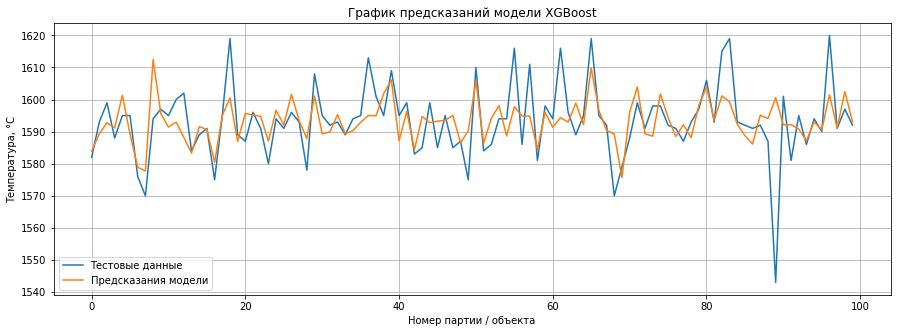

In [137]:
extansive_score(y_test, prediction_xgb, 100, model_name='XGBoost')

**Вывод по разделу:**

Наиболее хорошо по метрике показала себя модель XGBoost	{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'random_state': 42}	

## Проверка качества лучшей модели на тестовой выборке

In [138]:
mean_test_score_xgb = searcher_xgb.best_score_
print(mean_test_score_xgb)

0.3212125701306694


In [141]:
prediction_xgb = best_est_xgb.predict(X_test)
print('Метрика на тестовой выборке:', mean_absolute_error(y_test, prediction_xgb))

Метрика на тестовой выборке: 6.455267197885399


**Вывод по разделу:** 

Метрика на тестовой выборке соответствует требованиям менее 6.8

## Выявление важности признаков для XGBoostRegressor

,feature,importance
2,heating_time,0.24
0,initial_temperature,0.23
4,all_bulk,0.14
3,gas_1,0.13
5,all_wire,0.13
1,total_power,0.12


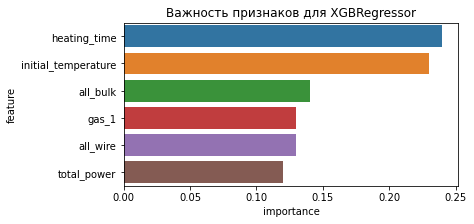

In [143]:
feature_importances_xgb = best_est_xgb.feature_importances_
importance_df_xgb = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances_xgb.round(2)
}).sort_values(by='importance', ascending=False)

display(importance_df_xgb)
plt.figure(figsize=(6, 3))
sns.barplot(data=importance_df_xgb, x='importance', y='feature')
plt.title('Важность признаков для XGBRegressor')
plt.show()


**Вывод по разделу:**

Наибольший вклад в определение моделью конечной температуры расплава вносят следующие параметры: 

1. Начальная температура
2. Время нагрева
3. Присадки

## Выводы и рекомендации

1. Выводы хода работы есть после каждого раздела, кратко: произведена загрузка, предобработка, удаление аномалий, объединение данных. Также произведен исследовательский анализ данных как до, так и после объединения, на основе этого анализа решено объединить признаки добавленных присадок в один признак, добавлены новые признаки "Полная мощность" и "Время нагрева". Обзор данных показал, что время добавления присадок, как и календарное время включения и выключения электродов - избыточные величины, от них решено избавиться.

2. Произведенный после объединения всех данных в один датафрейм исследовательский анализ показал избыточность некоторых новых признаков, признак средней температуры показал высокую мультиколлениарность с другими признаками температуры и был удален.Показано, что если разбивать присадки на отдельные признаки, то это ведет к значительному усложнению модели и низкой производительности модели, построенной на основе таких данных. Столбцы с присадками разного рода (сыпучими и проволочными) были объединены в один признак.

3. Для целей математического моделирования данные были разбиты на выборки, затем  построен пайплайн и путем рандомизированного поиска определено, что наиболее хорошо и по времени работы, и по mean_test_score показала себя модель XGBoost, которая на тестовой выборке эта модель также показала высокую предсказательную способность 6.45 по метрике MAE.

4. Произведенный анализ важности признаков позволил определить, что наибольший вклад в определение моделью конечной температуры расплава вносят следующие параметры: Начальная температура, Время нагрева, Добавленные присадки любого вида. 

**Рекомендации:**

Промышленный процесс - сложная и взаимообусловленная система, тем не менее для улучшения прогностических способностей модели следует в ходе процесса чаще измерять температуру, например до и после включения электродов (несколько раз для повышения качетсва данных), также следует в условиях контролируемого эксперимента установить как та, или иная присадка влияет на температуру, возможно более интересной и применимой для химического процесса моделью будет временной ряд по каждой партии, что может быть необходимо для выявления *динамики* хода температуры в котле. Учитывая высокую вариативность времени нагрева и мощности, стоит рассмотреть возможность оптимизации этих процессов.